In [90]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [94]:
def tl_pb_decay(nTl,t,tMax):
    '''Function for calculting the decay of Tl 208 to Pb 208'''
    
    tau=183.18 # Half-life in sconds
    pStep=1-2.**(-t/tau) # Prob of decay for one timestep
    
    # Setup arrays for time and number of atoms
    timePts=np.linspace(0.,tMax*t,tMax)
    tlPts=np.zeros(tMax)
    tlPts[0]=nTl
    pbPts=np.zeros(tMax)
    
    for time in range(tMax-1):
        
        # Get nTl random numbers
        rands=np.random.rand(int(tlPts[time]))
        
        # See how many Tl atoms decayed
        nDecay=len(np.where(rands < pStep)[0])
        
        # Update totals
        tlPts[time+1]=tlPts[time]-nDecay
        pbPts[time+1]=pbPts[time]+nDecay
        
    return timePts,tlPts,pbPts
        
    

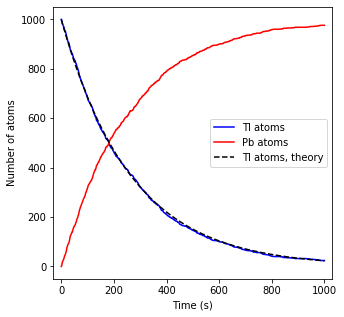

In [96]:
# Parameters
nTl=1000
t=1.
tMax=1000

# Get number ot Tl and Pb with time
timePts,tlPts,pbPts=tl_pb_decay(nTl,t,tMax)

# Plot
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(timePts,tlPts,'b',label='Tl atoms')
ax.plot(timePts,pbPts,'r',label='Pb atoms')

# Theoretical curve, N(t)=N(0)*2**(-t/tau)
ax.plot(timePts,nTl*2**(-timePts/183.18),'k--',label='Tl atoms, theory')

# Plot properties
ax.set_xlabel('Time (s)')
ax.set_ylabel('Number of atoms')
ax.set_xlim(-30,1030)
ax.legend()

plt.savefig('decay.pdf',bbox_inches='tight')
plt.show()

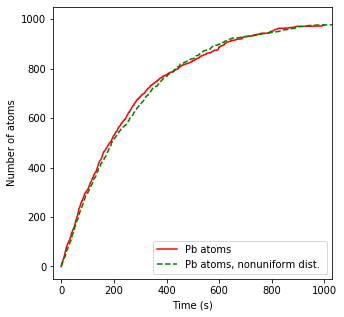

In [93]:
# Same problem as above, with random sampling of nonuniform distribution

# Parameters
nTl=1000
t=1.
tMax=1000
tau=183.18

# Generate ordered array of random numbers chosen from a nonuiform distribution
x=np.sort(-(tau/np.log(2))*np.log(1-np.random.rand(nTl)))
nDecay=np.arange(1000)

# Plot
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(timePts,pbPts,'r',label='Pb atoms')
ax.plot(x,nDecay,'g--',label='Pb atoms, nonuniform dist. ')

# Plot properties
ax.set_xlabel('Time (s)')
ax.set_ylabel('Number of atoms')
ax.set_xlim(-30,1030)
ax.legend()

plt.savefig('decay_nonuniform.pdf',bbox_inches='tight')
plt.show()